In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("IPL.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [12]:
print(f"Rows are : {df.shape[0]} and Columns are : {df.shape[1]}")

Rows are : 74 and Columns are : 20


In [ ]:
df.isnull().sum() #all the columns have zero null value

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

Text(0.5, 1.0, 'Most Match Win by Team')

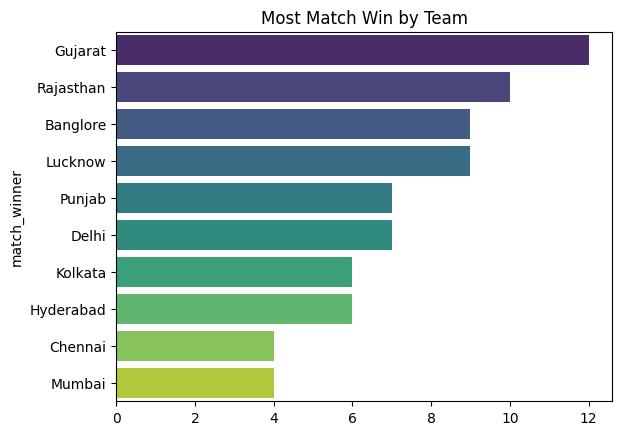

In [19]:
#what team won the most matches?
match_wins = df['match_winner'].value_counts()  #value_counts give a series of unique index and their sum values
sns.barplot(y=match_wins.index, x=match_wins.values, palette="viridis")
plt.title("Most Match Win by Team")

Text(0.5, 1.0, 'Toss Decision Trends')

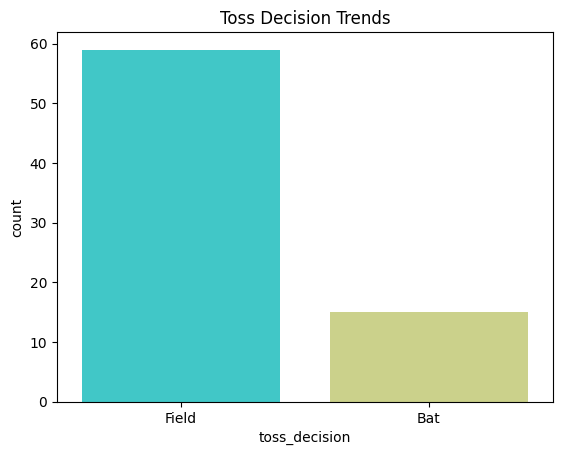

In [23]:
# Toss Decision trends
sns.countplot(x=df["toss_decision"], palette="rainbow")
plt.title("Toss Decision Trends")

In [29]:
# Toss winner vs match winner 
count = df[df["toss_winner"] == df["match_winner"]]["match_id"].count()
percentage = (count * 100)/df.shape[0]
percentage.round(2)

np.float64(48.65)

Text(0.5, 1.0, 'Won by')

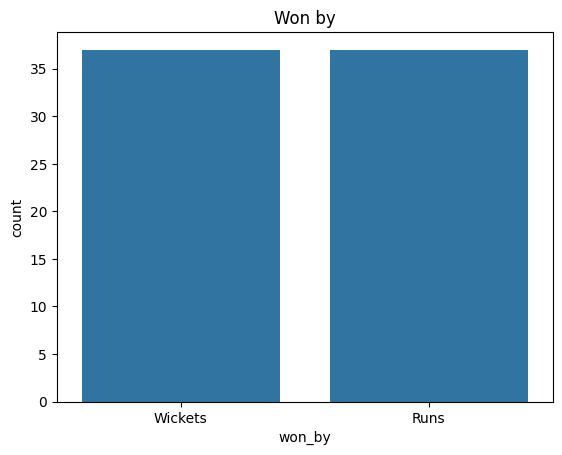

In [31]:
# How to teams win? Runs vs Wicket
sns.countplot(x=df["won_by"])
plt.title("Won by")

Text(0.5, 1.0, 'Top 10 Player With men of the match')

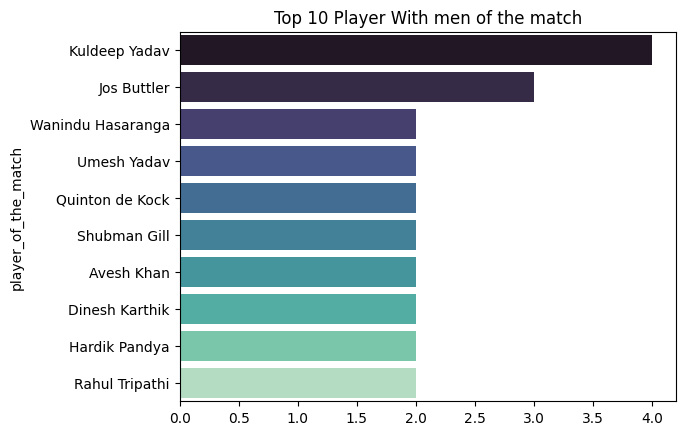

In [39]:
# Key player performances
#1 most "player of the match awards"
counts = df["player_of_the_match"].value_counts().head(10)
counts
sns.barplot(x=counts.values, y=counts.index, palette="mako")
plt.title("Top 10 Player With men of the match")

Text(0.5, 1.0, 'Top Scorers')

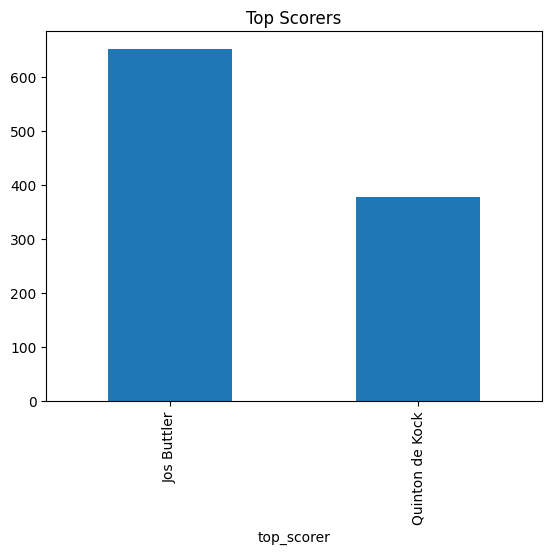

In [60]:
#Top Scorers
high = df.groupby("top_scorer")["highscore"].sum().sort_values(ascending=False).head(2)
high.plot(kind="bar")
plt.title("Top Scorers")

<Axes: ylabel='best_bowling'>

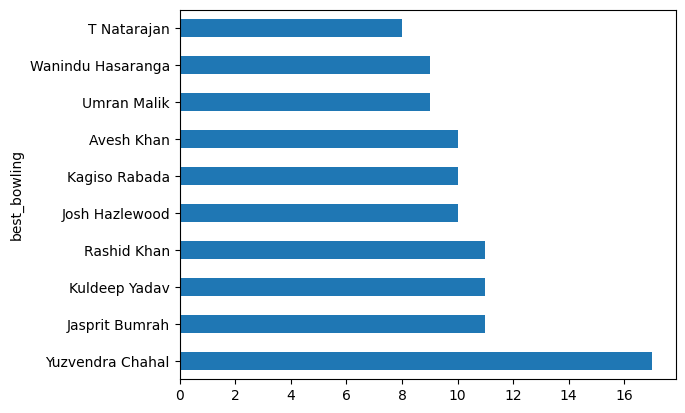

In [68]:
#10 best bowing figures
df["highest_wickets"] = df["best_bowling_figure"].apply(lambda x: x.split("--")[0])
df["highest_wickets"] = df["highest_wickets"].astype(int)
top_bowlers = df.groupby("best_bowling")["highest_wickets"].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind="barh")

In [69]:
# Venue Analysis
# Most Matches Played by Venue
venue_count = df["venue"].value_counts()
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

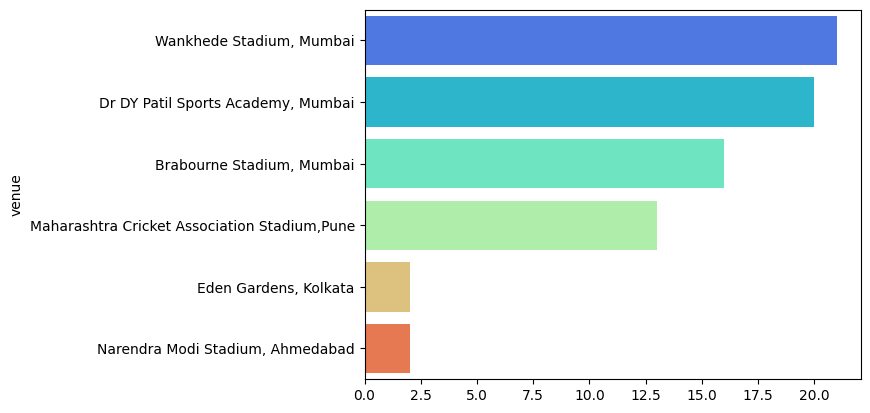

In [71]:
sns.barplot(x = venue_count.values , y=venue_count.index, palette="rainbow")

In [ ]:
#Q1. Who won the highest margin by runs?
df[df["won_by"] == "Runs"].sort_values(by ="margin", ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


In [79]:
# Q2. Which player has the highest individual score? 
df[df["highscore"] == df["highscore"].max()][["top_scorer","highscore"]]

,top_scorer,highscore
65,Quinton de Kock,140


In [82]:
# Q3. which bowlers had the best bowling figures?
df[df["highest_wickets"] == df["highest_wickets"].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
